# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output
import torch

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gusviloca@GU.GU.SE/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# IN THIS BOX YOU ARE ALLOWED TO ADD ANY CODE FOR SETTING UP A PYTORCH DEVICE

# fix path

In [3]:
device = torch.device('cuda:1')

In [4]:
dataset = DataLoader(data_dir='/home/gusviloca@GU.GU.SE/ML-ass1/DDICorpus', device=device)

In [5]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
0,DDI-DrugBank.d629.s0,1,0,3,val
1,DDI-DrugBank.d629.s0,2,5,17,val
2,DDI-DrugBank.d629.s0,3,19,21,val
3,DDI-DrugBank.d629.s0,4,23,26,val
4,DDI-DrugBank.d629.s0,5,28,35,val


In [6]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
0,DDI-DrugBank.d629.s0,3,5,17
1,DDI-DrugBank.d629.s0,5,79,86
2,DDI-DrugBank.d629.s0,3,92,99
3,DDI-DrugBank.d629.s1,2,46,53
4,DDI-DrugBank.d629.s1,3,56,68


In [7]:
dataset.vocab[:15]

['Oral',
 'metronidazole',
 'has',
 'been',
 'reported',
 'to',
 'potentiate',
 'the',
 'anticoagulant',
 'effect',
 'of',
 'coumarin',
 'and',
 'warfarin',
 ',']

In [8]:
dataset.id2ner

{1: 'not_ner', 2: 'brand', 3: 'drug', 4: 'drug_n', 5: 'group'}

In [9]:
dataset.max_sample_length

132

In [10]:
dataset.get_random_sample()

/home/gusviloca@GU.GU.SE/ML-ass1/lt2316-h20-aa/aa/data_loading.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'Only a few mRPCs expressed recoverin in B6 mice .'

### Data Exploration

train done
test done
dev done
id2ner {1: 'not_ner', 2: 'brand', 3: 'drug', 4: 'drug_n', 5: 'group'}


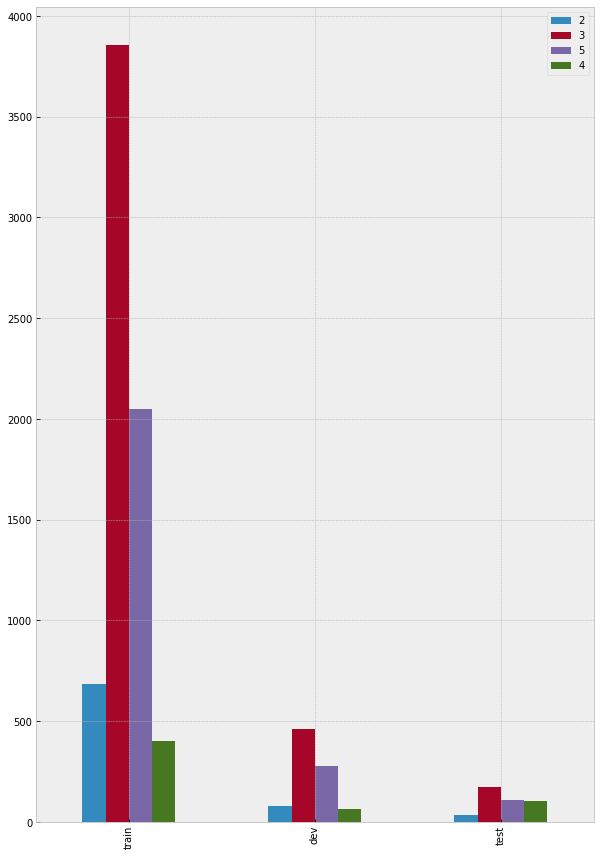

In [11]:
dataset.plot_split_ner_distribution()

### Labels

In [12]:
train_y, val_y, test_y = check_output(dataset.get_y())

train done
test done
dev done


## Extracting Features

In [13]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        #Add any addtional arguments here
                                                        id2word=dataset.id2word
                                                       ))

train features
train shape torch.Size([7272, 132, 4])
test features
test shape torch.Size([665, 132, 4])
dev features
dev shape torch.Size([932, 132, 4])


## Bonus Part: Explore Some more

In [14]:
#uncomment the code below if you want to do bonus part

Based on ner_df.
*will have more counts than basing it off of the xml files since an entity with two character offsets are counted as 2 entities in ner_df.
Bar Graph


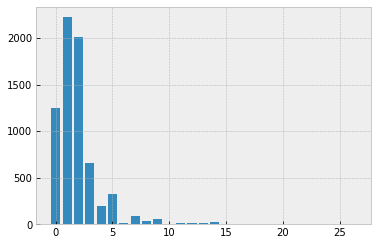

Histogram


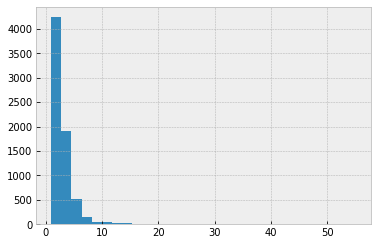

In [15]:
dataset.plot_ner_per_sample_distribution()

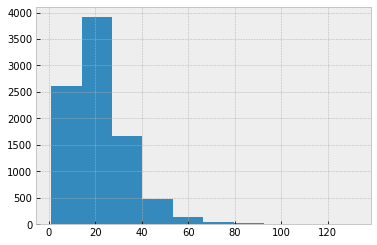

In [16]:
dataset.plot_sample_length_distribution()

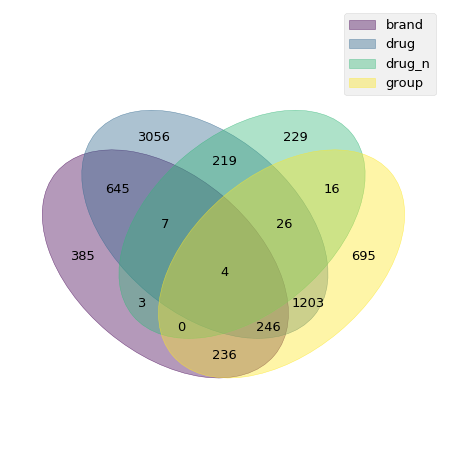

In [17]:
dataset.plot_ner_cooccurence_venndiagram()